In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
uber = pd.read_csv(r'C:\Users\jasik\OneDrive\Documents\Data Analysis\Data\UberDataset.csv')

In [6]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
uber.shape

(1156, 7)

In [8]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
# Data Cleaning
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
uber['PURPOSE'].fillna('Unknown', inplace = True)

C:\Users\jasik\AppData\Local\Temp\ipykernel_15748\1173949428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber['PURPOSE'].fillna('Unknown', inplace = True)


In [11]:
uber.dropna(inplace = True)

In [12]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [13]:
# Data Processing
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], errors = 'coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'], errors = 'coerce')

In [14]:
# Splitting START_DATE to date and time columns for further analysis
uber['Start_Date'] = pd.DatetimeIndex(uber['START_DATE']).date
uber['Start_Time'] = pd.DatetimeIndex(uber['START_DATE']).hour

uber['Day_Shift'] = pd.cut(x = uber['Start_Time'], bins = [0,11, 15, 19, 24],
                             labels =['Morning', 'Afternoon', 'Evening', 'Night'])

In [15]:
uber.duplicated().sum()

56

In [28]:
uber.drop_duplicates(inplace = True)

In [30]:
obj = (uber.dtypes == 'object')
object_col = list(obj[obj].index)

In [32]:
unique_values = {}
for col in object_col:
    unique_values[col] = uber[col].nunique()
unique_values

{'CATEGORY': 2, 'START': 177, 'STOP': 188, 'PURPOSE': 11, 'Start_Date': 114}

In [34]:
# DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

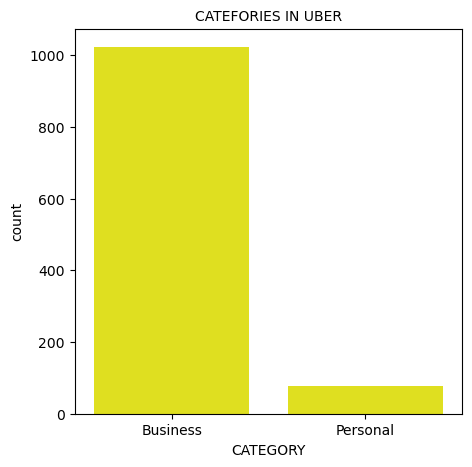

In [36]:
plt.figure(figsize = (5, 5))
sns.countplot(uber, x = 'CATEGORY', color = 'yellow')
plt.title('CATEFORIES IN UBER', fontsize = 10)
plt.show

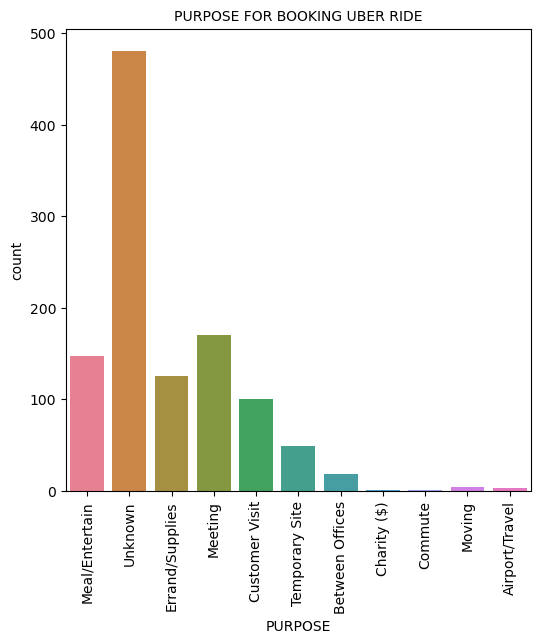

In [37]:
plt.figure(figsize = (6, 6))
sns.countplot(uber, x = 'PURPOSE', hue = 'PURPOSE')
plt.title('PURPOSE FOR BOOKING UBER RIDE', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

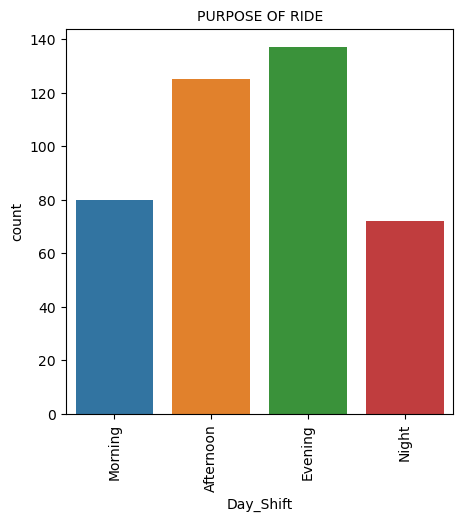

In [39]:
plt.figure(figsize = (5, 5))
sns.countplot(uber, x = 'Day_Shift', hue = 'Day_Shift', legend = False)
plt.title('PURPOSE OF RIDE', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

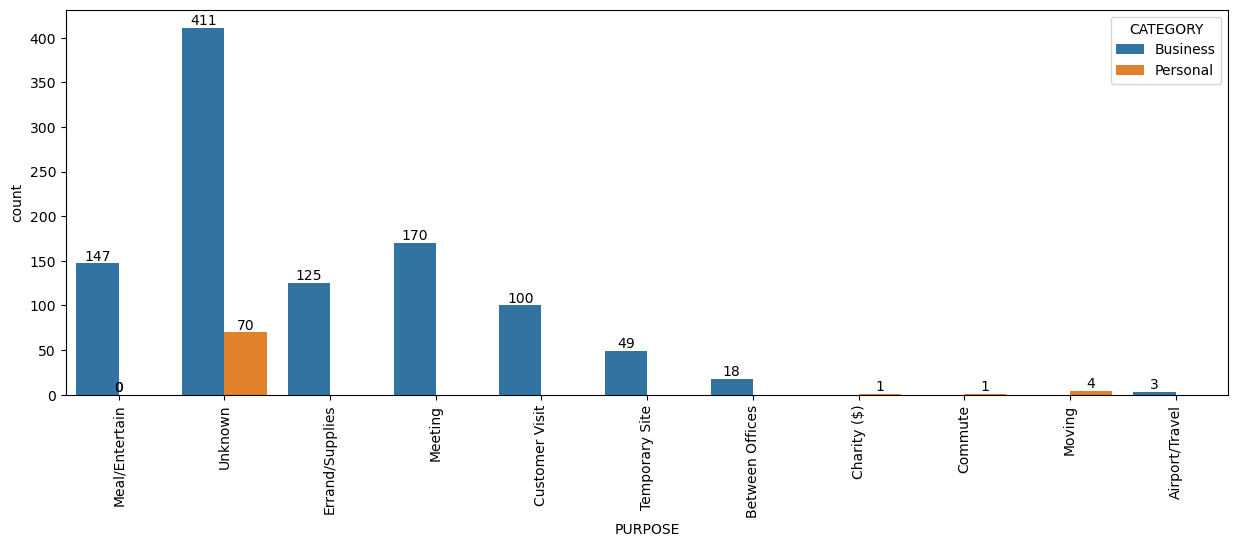

In [40]:
plt.figure(figsize = (15, 5))
purpose = sns.countplot(data = uber, x ='PURPOSE', hue ='CATEGORY')
plt.xticks(rotation=90)

for p in purpose.patches:
    purpose.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),  
                   ha='center', va='bottom', fontsize=10, color='black')  

plt.show()

plt.show()

In [42]:
# Handling Categorical Data 
from sklearn.preprocessing import OneHotEncoder

In [43]:
object_cols = ['CATEGORY', 'PURPOSE']

In [44]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [46]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(uber[object_cols]))
OH_cols.index = uber.index
OH_cols.columns = OH_encoder.get_feature_names_out()

In [47]:
df_final = uber.drop(object_cols, axis=1)
uber = pd.concat([df_final, OH_cols], axis=1)

In [48]:
uber.head()

,START_DATE,END_DATE,START,STOP,MILES,Start_Date,Start_Time,Day_Shift,CATEGORY_Business,CATEGORY_Personal,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site,PURPOSE_Unknown
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

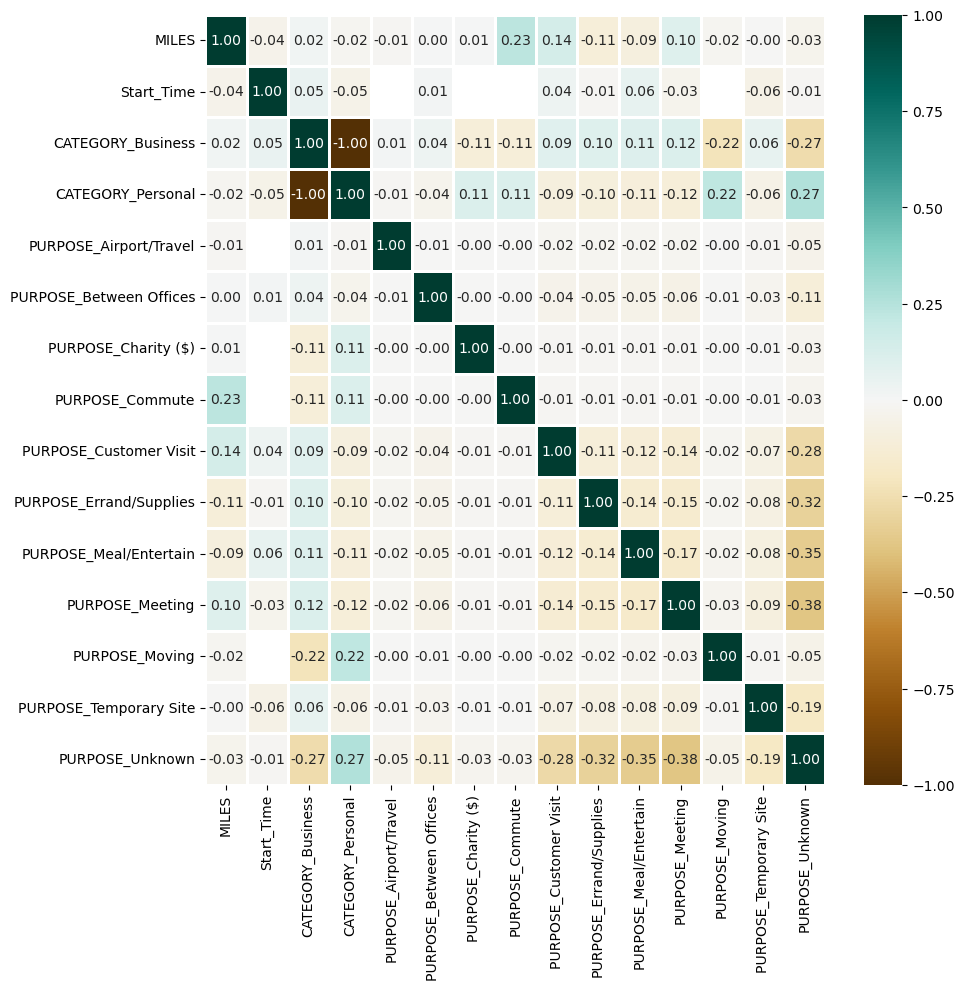

In [49]:
numeric_cols = uber.select_dtypes(include=['number'])

plt.figure(figsize = (10,10))
sns.heatmap(numeric_cols.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [51]:
# Mapping Months
uber['Month'] = pd.DatetimeIndex(uber['START_DATE']).month
month_map = { 1: 'JAN', 2 : 'FEB', 3 : 'MAR', 4: 'APR', 5 : 'MAY', 6 : 'JUNE',
            7: 'JULY', 8 : 'AUG', 9 : 'SEP', 10: 'OCT', 11 : 'NOV', 12 : 'DEC'}
uber['MONTH'] = uber['Month'].map(month_map)

In [52]:
month = uber.MONTH.value_counts(sort=False)

In [53]:
df = pd.DataFrame({"MONTHS": month.values,
                   "VALUE COUNT": uber.groupby('MONTH', sort=False)['MILES'].max()})

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

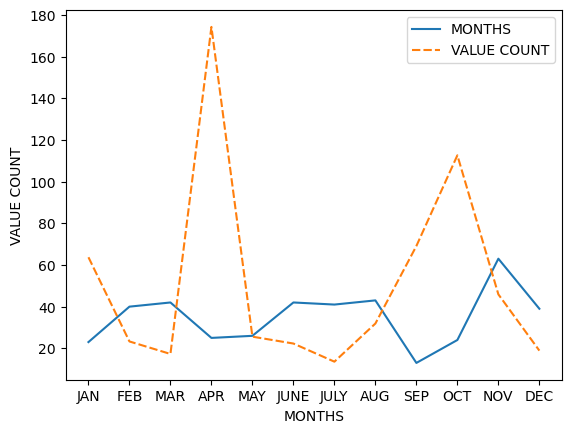

In [56]:
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [61]:
uber['DAY'] = uber.START_DATE.dt.weekday
day_map = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
uber['DAY'] = uber['DAY'].map(day_map)


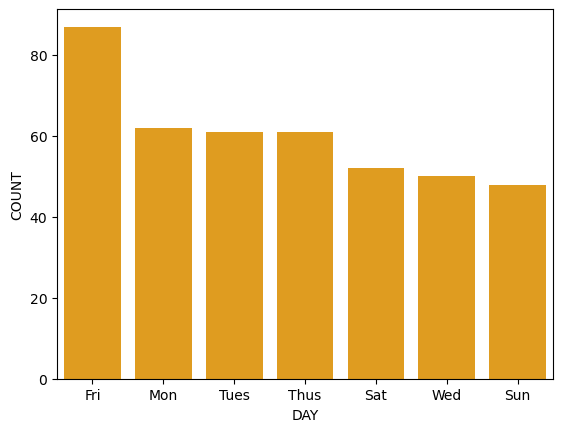

In [62]:
day_map = uber.DAY.value_counts()
sns.barplot(x=day_map.index, y=day_map, color = 'orange');
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

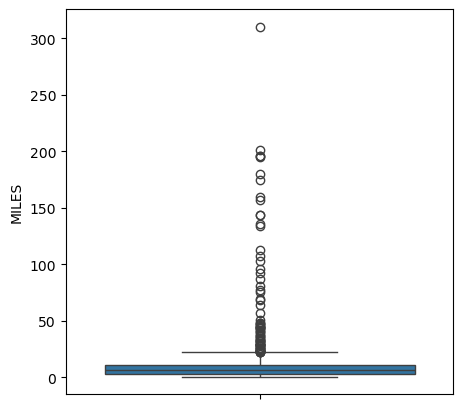

In [63]:
plt.figure(figsize = (5,5))
sns.boxplot(uber['MILES'])
plt.show()

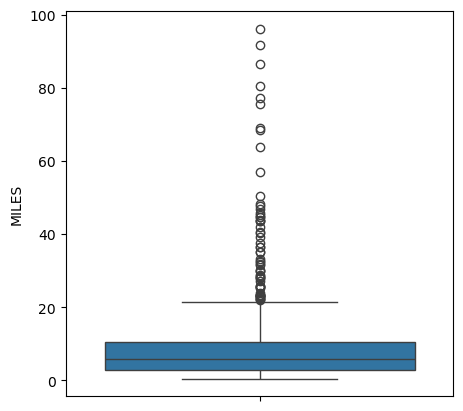

In [64]:
plt.figure(figsize = (5,5))
sns.boxplot(uber[uber['MILES']<100] ['MILES'])
plt.show()

C:\Users\jasik\AppData\Local\Temp\ipykernel_15748\1607664177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber[uber['MILES']<40]['MILES'])


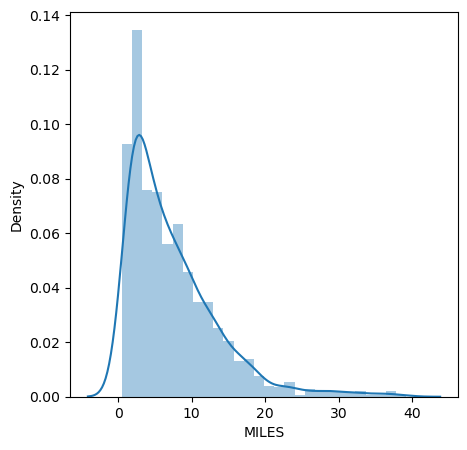

In [65]:
plt.figure(figsize = (5,5))
sns.distplot(uber[uber['MILES']<40]['MILES'])
plt.show()

Project By : JASIKA GUPTA 

LinkedIn : https://www.linkedin.com/in/jasika-gupta17/ 

GitHub : https://github.com/jasikagupta04/jasikagupta04

THANK YOU!